In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_process import ArmaProcess

In [11]:
sns.set()
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15,9)

In [12]:
np.random.seed(200)

ar_params = np.array([1, -.5])
ma_params = np.array([1, -.3])
ret = ArmaProcess(ar_params, ma_params).generate_sample(nsample=5*252)

ret = pd.Series(ret)
drift = 100
price = pd.Series(np.cumsum(ret)) + drift

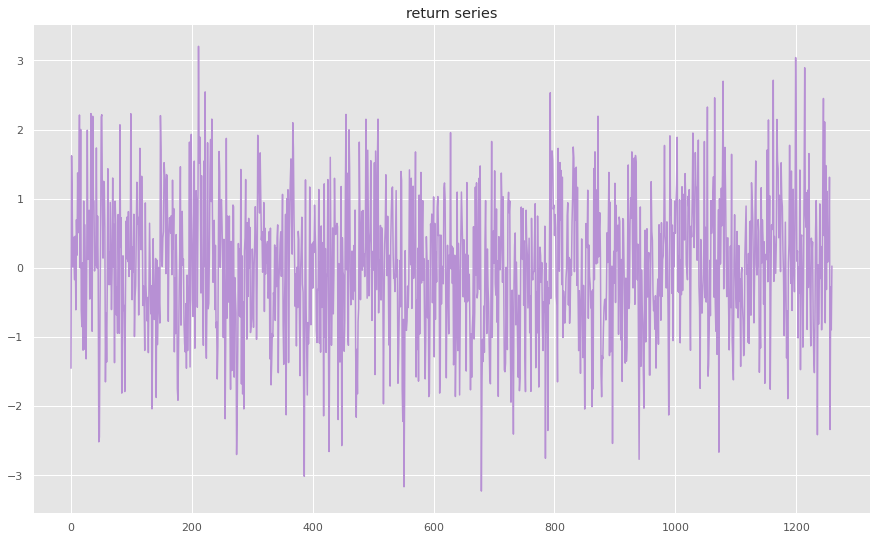

In [13]:
ret.plot(color = sns.xkcd_rgb['pale purple'], title='return series')
plt.show()

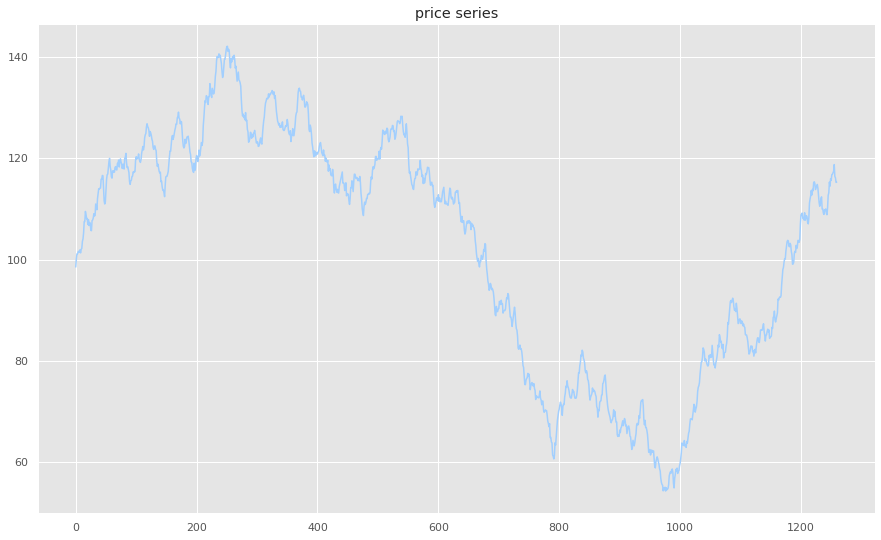

In [14]:
price.plot(color=sns.xkcd_rgb['baby blue'] , title='price series')
plt.show()

## Log returns

In [15]:
lret = np.log(price) - np.log(price.shift(1))
lret = lret[1:]

## Autocorrelation

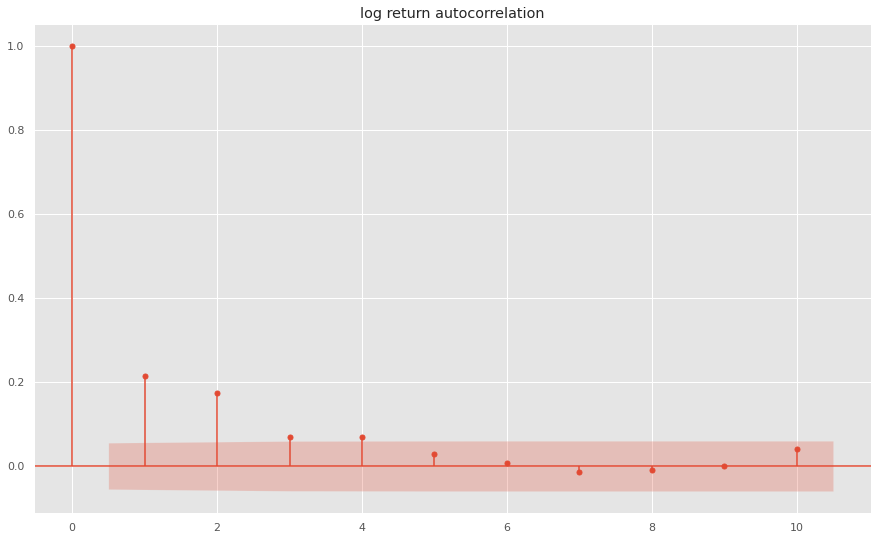

In [16]:
from statsmodels.graphics.tsaplots import plot_acf

_ = plot_acf(lret, lags=10, title='log return autocorrelation')

## Partial autocorrelation

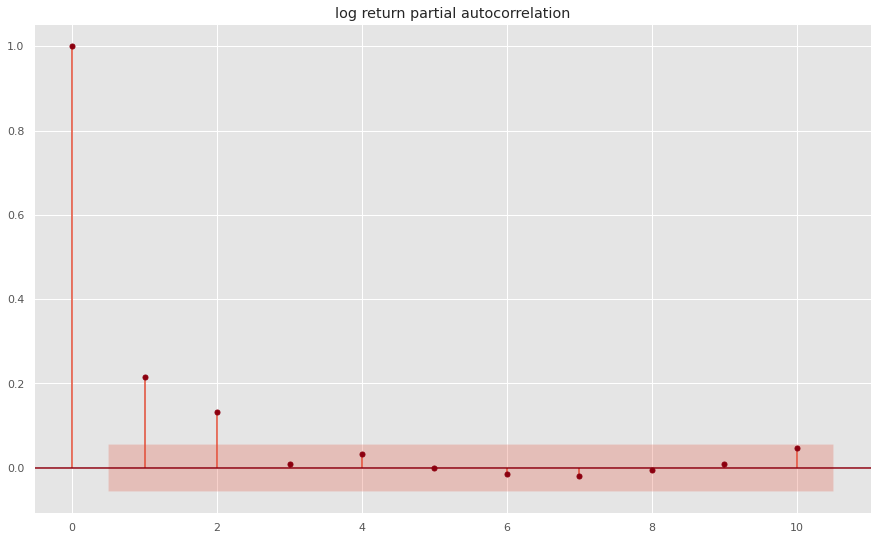

In [17]:
from statsmodels.graphics.tsaplots import plot_pacf

_ = plot_pacf(lret, lags=10, title='log return partial autocorrelation', color=sns.xkcd_rgb['crimson'])

# Ljung-Box test
Helps to check whether the lag we selected gives autocorrelations that are significantly different from zero.
Null hypothesis - previous lags as a whole are not corelated with the current period. 

In [18]:
from statsmodels.stats.diagnostic import acorr_ljungbox

In [19]:
lb_test_stats, lb_p_value = acorr_ljungbox(lret, lags=20)
lb_p_value

/usr/local/lib/python3.8/site-packages/statsmodels/stats/diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


array([2.01640711e-14, 1.24123312e-21, 5.10501473e-22, 1.86446247e-22,
       6.13688232e-22, 2.96811370e-21, 1.18392407e-20, 4.64232373e-20,
       1.78935377e-19, 2.36770725e-19, 5.54712773e-19, 1.32980392e-18,
       3.72359442e-18, 5.86709112e-18, 1.72205886e-17, 4.22143078e-17,
       1.15704571e-16, 9.89290170e-17, 2.59299780e-16, 1.50593115e-16])

# ARMA

In [20]:
from statsmodels.tsa.arima_model import ARMA

In [21]:
AR_lag_p = 1
MA_lag_q = 1
order = (AR_lag_p, MA_lag_q)
arma_model = ARMA(lret.values, order=order)
arma_result = arma_model.fit()
arma_pred = pd.Series(arma_result.fittedvalues)

/usr/local/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Fitted AR parameter 0.65, MA parameter -0.45


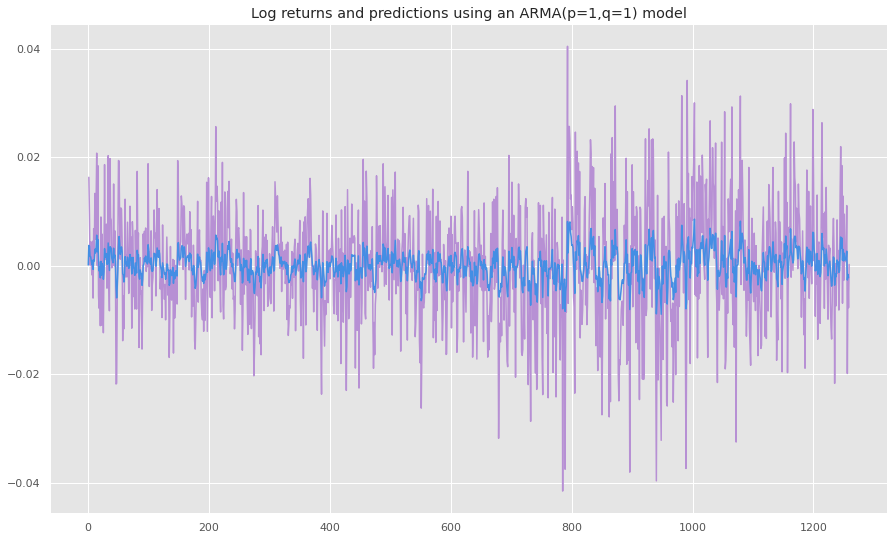

In [22]:
plt.plot(lret, color=sns.xkcd_rgb["pale purple"])
plt.plot(arma_pred, color=sns.xkcd_rgb["dark sky blue"])
plt.title('Log returns and predictions using an ARMA(p=1,q=1) model');
print(f"Fitted AR parameter {arma_result.arparams[0]:.2f}, MA parameter {arma_result.maparams[0]:.2f}")

# ARIMA

In [23]:
from statsmodels.tsa.arima_model import ARIMA

In [26]:
def fit_arima(lret):
    AR_lag_p = 1
    MA_lag_q = 1
    order_of_integration_d = 1
    
    order = (AR_lag_p, MA_lag_q, order_of_integration_d)
    
    arima_model = ARIMA(lret.values, order=order)
    
    arima_result = arima_model.fit()
    
    fittedvalues = arima_result.fittedvalues
    arparams = arima_result.arparams
    maparams = arima_result.maparams
    return (fittedvalues, arparams, maparams)
    


(array([-5.80041678e-07,  2.72820739e-03,  6.68519999e-03, ...,
         1.72269209e-02,  3.34857792e-03,  7.45629048e-03]),
 array([0.20683116]),
 array([-0.98225587]))

fitted AR parameter 0.21, MA parameter -0.98


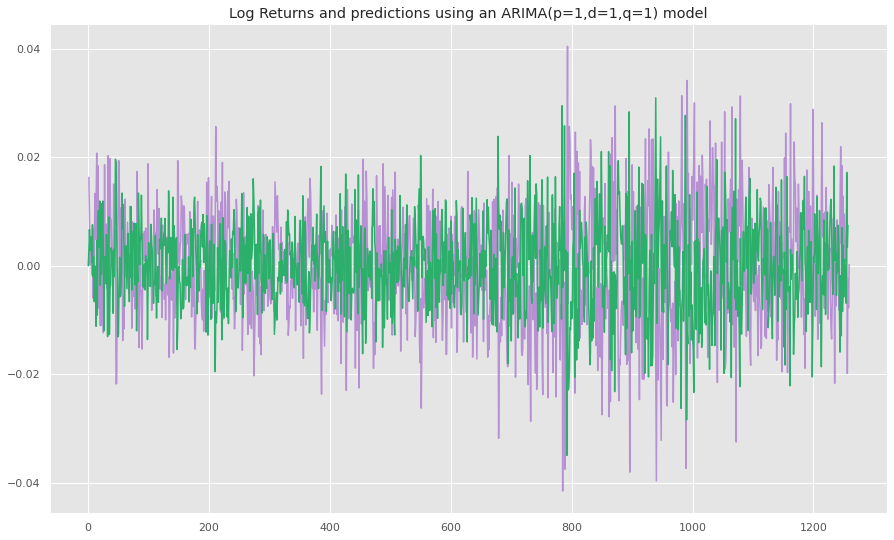

In [27]:
fittedvalues,arparams,maparams = fit_arima(lret)
arima_pred = pd.Series(fittedvalues)
plt.plot(lret, color=sns.xkcd_rgb["pale purple"])
plt.plot(arima_pred, color=sns.xkcd_rgb["jade green"])
plt.title('Log Returns and predictions using an ARIMA(p=1,d=1,q=1) model');
print(f"fitted AR parameter {arparams[0]:.2f}, MA parameter {maparams[0]:.2f}")